In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import plotly.express as px
import html

In [26]:
data_emissions = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
df = data_emissions[1] 
df.columns = ['country', 'co2_1990', 'co2_2005', 'co2_2017', 'world_percent_17', 'emmision_change_1990vs2017', 'per_land_area_2017', 'per_capita_2017', 'total_inc_lucf_2018', 'total_exc_lucf_2018']
df = df[df["country"].str.contains("World|European Union") == False] 
df.head()

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN


In [48]:
df["1990_rel_1990"]= df.loc[:,"co2_1990"] / df.loc[:,"co2_1990"] 
df["2005_rel_1990"]= df.loc[:,"co2_2005"] / df.loc[:,"co2_1990"] * 100
df["2017_rel_1990"]= df.loc[:,"co2_2017"] / df.loc[:,"co2_1990"] * 100
df

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,2005_rel_1990,2017_rel_1990,1990_rel_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,21033.333333,17266.666667,1.0
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,3475.257732,2545.360825,1.0
121,Maldives,0.065,0.479,0.964,0.00%,"1,383.1%",3213.0,2.2,1.91,1.91,736.923077,1483.076923,1.0
22,Benin,0.415,2.839,7.097,0.02%,"1,610.1%",62.0,0.6,18.62,7.91,684.096386,1710.120482,1.0
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,659.950860,2594.594595,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,25.468598,25.856620,1.0
108,Kyrgyzstan,23.696,5.475,11.180,0.03%,-52.8%,56.0,1.8,7.73,11.00,23.105165,47.180959,1.0
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,21.943089,23.344123,1.0
163,Saint Pierre and Miquelon,0.148,0.031,0.075,0.00%,-49.3%,310.0,11.9,NaN,NaN,20.945946,50.675676,1.0


In [45]:
df = df.sort_values(["1990_rel_1990"],ascending=False)
df = df.sort_values(["2017_rel_1990"],ascending=False)
df = df.sort_values(["2005_rel_1990"],ascending=False)
df

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,2005_rel_1990,2017_rel_1990,1990_rel_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,21033.333333,17266.666667,False
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,3475.257732,2545.360825,False
121,Maldives,0.065,0.479,0.964,0.00%,"1,383.1%",3213.0,2.2,1.91,1.91,736.923077,1483.076923,False
22,Benin,0.415,2.839,7.097,0.02%,"1,610.1%",62.0,0.6,18.62,7.91,684.096386,1710.120482,False
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,659.950860,2594.594595,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,25.468598,25.856620,False
108,Kyrgyzstan,23.696,5.475,11.180,0.03%,-52.8%,56.0,1.8,7.73,11.00,23.105165,47.180959,False
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,21.943089,23.344123,False
163,Saint Pierre and Miquelon,0.148,0.031,0.075,0.00%,-49.3%,310.0,11.9,NaN,NaN,20.945946,50.675676,False


In [46]:
head_df = df.head(3)
head_df = head_df.append(df.tail(3))
head_df


,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018,2005_rel_1990,2017_rel_1990,1990_rel_1990
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,21033.333333,17266.666667,False
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,3475.257732,2545.360825,False
121,Maldives,0.065,0.479,0.964,0.00%,"1,383.1%",3213.0,2.2,1.91,1.91,736.923077,1483.076923,False
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,21.943089,23.344123,False
163,Saint Pierre and Miquelon,0.148,0.031,0.075,0.00%,-49.3%,310.0,11.9,NaN,NaN,20.945946,50.675676,False
76,Georgia,34.745,4.979,11.558,0.03%,-66.7%,166.0,3.0,9.46,9.46,14.330119,33.265218,False


<Figure size 432x288 with 0 Axes>

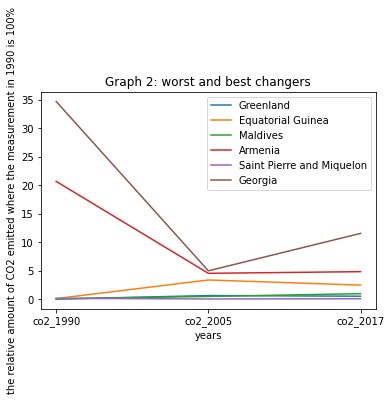

In [47]:
fig = plt.figure()
fig, ax = plt.subplots()
years = head_df.columns[1:4]

for index, row in head_df.iterrows():
   plt.plot(years, row[1:4], label = row[0])

plt.title("Graph 2: worst and best changers")
plt.xlabel("years")
plt.ylabel("the relative amount of CO2 emitted where the measurement in 1990 is 100%")
ax.legend()
